In [1]:
import numpy as np
import pandas as pd
import re
import yfinance as yf

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

In [2]:
df = pd.read_csv('main_data.csv')  

In [4]:
df['DATE'] = pd.to_datetime(
                          df['DATE'],
                          format='%Y-%m-%d')

In [5]:
df = df.sort_values(by="DATE")

In [6]:
df.head()

,Unnamed: 0,DATE,ID,STOCK,SECTOR,TYPE,SCORE,TIME,1MReturn,3MReturn,6MReturn,12MReturn
0,0,2004-02-11,GN63J3-R,SU,Energy Minerals,MERGED,0.953727,10:01:54.391,0.017659,-0.083391,0.052675,0.416997
8875,8875,2004-02-11,NaN,PEAK,NaN,NaN,NaN,NaN,-0.033656,-0.209157,-0.106319,-0.012554
8852,8852,2004-02-11,NaN,ANSS,NaN,NaN,NaN,NaN,-0.065450,-0.052068,0.097324,0.672506
1104,1104,2004-02-11,MH3J5L-R,CHH,Consumer Services,MERGED,0.679180,10:01:54.394,0.124837,0.171676,0.332258,0.565463
8829,8829,2004-02-11,NaN,MUR,NaN,NaN,NaN,NaN,0.035292,0.099318,0.181475,0.547180


In [7]:
df[df.columns[df.isnull().any()]].isnull().sum() * 100 / df.shape[0]

ID        24.496621
SECTOR    24.496621
TYPE      24.496621
SCORE     41.642862
TIME      24.496621
dtype: float64

In [17]:
is_any_null_per_stock = df.groupby('STOCK')['SCORE'].apply(lambda x: x.isnull().any()).to_frame()

In [18]:
is_any_null_per_stock.head()

,SCORE
STOCK,
AA,True
AAIC,False
AAP,False
ABC,True
ABG,True


In [30]:
any_null_per_stock_count = is_any_null_per_stock['SCORE'].value_counts().to_frame()
any_null_per_stock_count.reset_index(inplace=True)
any_null_per_stock_count.columns = ['VALUE', 'COUNT']

In [31]:
any_null_per_stock_count.head()

,VALUE,COUNT
0,True,483
1,False,138


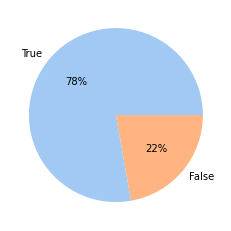

In [34]:
plt.pie(any_null_per_stock_count['COUNT'], labels = any_null_per_stock_count['VALUE'], colors = colors, autopct='%.0f%%')
plt.show()